In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = '../output_video/player_1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

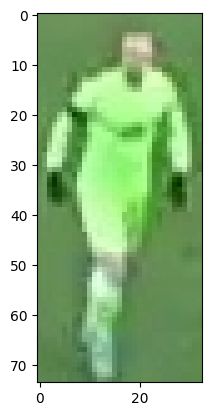

In [5]:
plt.imshow(image)
plt.show()

# Pegando a parte de cima da imagem (camisa do jogador!)

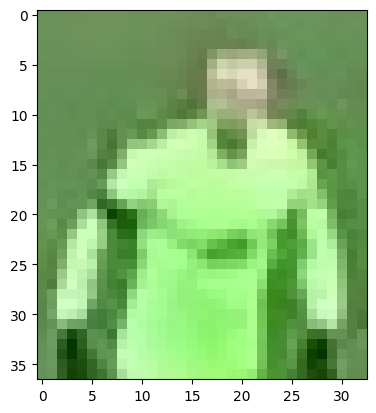

In [6]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)
plt.show()

# Clusterizando a imagem

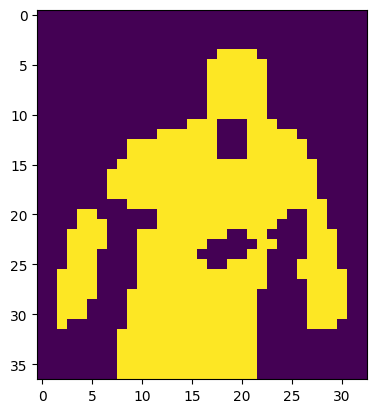

In [11]:
image_2d = top_half_image.reshape((-1, 3))

kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

labels = kmeans.labels_

clustered_images = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

plt.imshow(clustered_images)
plt.show()

In [12]:
corner_clusters = [clustered_images[0, 0], clustered_images[0, -1], clustered_images[-1, 0], clustered_images[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [13]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [14]:
kmeans.cluster_centers_[player_cluster]

array([172.95634096, 237.75467775, 148.08523909])